In [13]:
from __future__ import print_function, division
import networkx as nx
import math

n = 500
m = 2
m = 3
m = 5
m = 10

DATASET = "/Users/tnguyen/dataspace/graph/pa_graph/"
EDGELIST = DATASET + "/edgelist/pa,n={0},m={1}.edgelist".format(n,m)

G = nx.barabasi_albert_graph(n,m)
# nx.write_edgelist(G, path=EDGELIST, delimiter=" ", data=False)

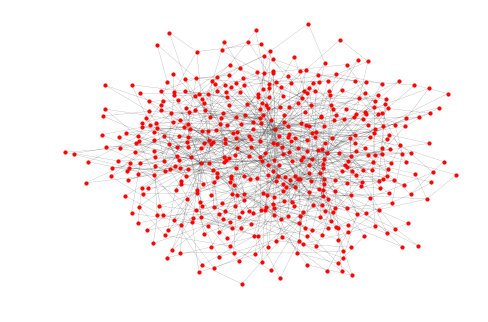

In [14]:
%matplotlib inline

nx.draw(G, node_size=10, width=0.1)

In [4]:
NODE2VEC = "../node2vec/src/main.py"
OUTPUT = DATASET + "/emb/pa,n={0},m={1}.emb".format(n,k,p)

import os
import subprocess

def node2vec(edgelist, emb):
    cmd = [
        'python', NODE2VEC,
        '--input', edgelist,
        '--output', emb,
    ]
    print(" ".join(cmd))
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout = process.communicate()[0]
    print('STDOUT:{}'.format(stdout))
    return
node2vec(EDGELIST, OUTPUT)

python ./node2vec/src/main.py --input /Users/tnguyen/dataspace/graph/erdos//edgelist/erdos,n=10000,p=0.0001.edgelist --output /Users/tnguyen/dataspace/graph/erdos//emb/erdos,n=10000,p=0.0001.emb
STDOUT:Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
--- 43.9140808582 seconds ---



In [5]:
cmd = [
        'python', "../edge2vec/edge_classifier.py",
        '--edgelist', EDGELIST,
        '--nodeemb', OUTPUT,
        '--func', 'hadamard',
        '--verbose'
    ]
print(" ".join(cmd))
# process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
# stdout = process.communicate()[0]
# print('STDOUT:{}'.format(stdout))

python ./edge2vec/edge_classifier.py --edgelist /Users/tnguyen/dataspace/graph/erdos//edgelist/erdos,n=10000,p=0.0001.edgelist --nodeemb /Users/tnguyen/dataspace/graph/erdos//emb/erdos,n=10000,p=0.0001.emb --func hadamard --verbose
